<a href="https://colab.research.google.com/github/jsan2321/Challenge-Alura-Store-Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

# URLs de los archivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Calcular ingresos totales
ingreso_total_tienda1 = tienda1['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f"Facturación total Tienda 1: ${ingreso_total_tienda1:.2f}")
print(f"Facturación total Tienda 2: ${ingreso_total_tienda2:.2f}")
print(f"Facturación total Tienda 3: ${ingreso_total_tienda3:.2f}")
print(f"Facturación total Tienda 4: ${ingreso_total_tienda4:.2f}")

# Determinar la tienda con menor facturación
facturacion = {
    'Tienda 1': ingreso_total_tienda1,
    'Tienda 2': ingreso_total_tienda2,
    'Tienda 3': ingreso_total_tienda3,
    'Tienda 4': ingreso_total_tienda4
}

tienda_menos_rentable = min(facturacion, key=facturacion.get)
print(f"\nLa tienda menos rentable es: {tienda_menos_rentable} con ${facturacion[tienda_menos_rentable]:.2f}")

Facturación total Tienda 1: $1150880400.00
Facturación total Tienda 2: $1116343500.00
Facturación total Tienda 3: $1098019600.00
Facturación total Tienda 4: $1038375700.00

La tienda menos rentable es: Tienda 4 con $1038375700.00


# 2. Ventas por categoría

In [ ]:
# Función para calcular ventas por categoría
def ventas_por_categoria(df, nombre_tienda):
    grupo = df.groupby('Categoría del Producto').size().reset_index(name='Cantidad de Ventas')
    grupo = grupo.sort_values(by='Cantidad de Ventas', ascending=False)
    print(f"\n--- {nombre_tienda} ---")
    print(grupo.to_string(index=False))

# Aplicar la función a cada tienda
ventas_por_categoria(tienda1, "Tienda 1")
ventas_por_categoria(tienda2, "Tienda 2")
ventas_por_categoria(tienda3, "Tienda 3")
ventas_por_categoria(tienda4, "Tienda 4")


--- Tienda 1 ---
 Categoría del Producto  Cantidad de Ventas
                Muebles                 465
           Electrónicos                 448
               Juguetes                 324
      Electrodomésticos                 312
   Deportes y diversión                 284
 Instrumentos musicales                 182
                 Libros                 173
Artículos para el hogar                 171

--- Tienda 2 ---
 Categoría del Producto  Cantidad de Ventas
                Muebles                 442
           Electrónicos                 422
               Juguetes                 313
      Electrodomésticos                 305
   Deportes y diversión                 275
 Instrumentos musicales                 224
                 Libros                 197
Artículos para el hogar                 181

--- Tienda 3 ---
 Categoría del Producto  Cantidad de Ventas
                Muebles                 499
           Electrónicos                 451
               Juguete

# 3. Calificación promedio de la tienda


In [ ]:
# Función para calcular el promedio de calificaciones
def calificacion_promedio(df, nombre_tienda):
    if 'Calificación' in df.columns:
        promedio = df['Calificación'].mean()
        print(f"{nombre_tienda}: Calificación promedio = {promedio:.2f}")
    else:
        print(f"{nombre_tienda}: No se encontró la columna 'Calificación'.")

# Calcular y mostrar resultados
calificacion_promedio(tienda1, "Tienda 1")
calificacion_promedio(tienda2, "Tienda 2")
calificacion_promedio(tienda3, "Tienda 3")
calificacion_promedio(tienda4, "Tienda 4")

Tienda 1: Calificación promedio = 3.98
Tienda 2: Calificación promedio = 4.04
Tienda 3: Calificación promedio = 4.05
Tienda 4: Calificación promedio = 4.00


# 4. Productos más y menos vendidos

In [ ]:
# Función para encontrar productos más y menos vendidos
def productos_mas_y_menos_vendidos(df, nombre_tienda):
    if 'Producto' in df.columns:
        # Contar ventas por producto
        ventas_producto = df['Producto'].value_counts().reset_index()
        ventas_producto.columns = ['Producto', 'Cantidad de Ventas']

        # Obtener más y menos vendido
        mas_vendido = ventas_producto.iloc[0]
        menos_vendido = ventas_producto.iloc[-1]

        print(f"\n--- {nombre_tienda} ---")
        print(f"Producto más vendido: {mas_vendido['Producto']} ({mas_vendido['Cantidad de Ventas']} ventas)")
        print(f"Producto menos vendido: {menos_vendido['Producto']} ({menos_vendido['Cantidad de Ventas']} ventas)")
    else:
        print(f"{nombre_tienda}: No se encontró la columna 'Producto'.")

# Aplicar función a cada tienda
productos_mas_y_menos_vendidos(tienda1, "Tienda 1")
productos_mas_y_menos_vendidos(tienda2, "Tienda 2")
productos_mas_y_menos_vendidos(tienda3, "Tienda 3")
productos_mas_y_menos_vendidos(tienda4, "Tienda 4")


--- Tienda 1 ---
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Celular ABXY (33 ventas)

--- Tienda 2 ---
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

--- Tienda 3 ---
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

--- Tienda 4 ---
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


# 5. Envío promedio por tienda

In [ ]:
# Función para calcular el costo promedio de envío
def costo_envio_promedio(df, nombre_tienda):
    if 'Costo de envío' in df.columns:
        promedio = df['Costo de envío'].mean()
        print(f"{nombre_tienda}: Costo promedio de envío = ${promedio:.2f}")
    else:
        print(f"{nombre_tienda}: No se encontró la columna 'Costo de envío'.")

# Calcular y mostrar resultados
costo_envio_promedio(tienda1, "Tienda 1")
costo_envio_promedio(tienda2, "Tienda 2")
costo_envio_promedio(tienda3, "Tienda 3")
costo_envio_promedio(tienda4, "Tienda 4")

Tienda 1: Costo promedio de envío = $26018.61
Tienda 2: Costo promedio de envío = $25216.24
Tienda 3: Costo promedio de envío = $24805.68
Tienda 4: Costo promedio de envío = $23459.46


# Visualización

In [ ]:
# Calcular métricas básicas
def obtener_metricas(df, nombre_tienda):
    facturacion = df['Precio'].sum()
    calificacion_promedio = df['Calificación'].mean() if 'Calificación' in df.columns else 0
    costo_envio_promedio = df['Costo de envío'].mean() if 'Costo de envío' in df.columns else 0
    categoria_popular = df['Categoría del Producto'].mode()[0] if 'Categoría del Producto' in df.columns else ''
    return {
        'Tienda': nombre_tienda,
        'Facturación': facturacion,
        'Calificación Promedio': calificacion_promedio,
        'Costo de Envío Promedio': costo_envio_promedio,
        'Categoría Popular': categoria_popular
    }

# Recopilar datos
metricas = [
    obtener_metricas(tienda1, 'Tienda 1'),
    obtener_metricas(tienda2, 'Tienda 2'),
    obtener_metricas(tienda3, 'Tienda 3'),
    obtener_metricas(tienda4, 'Tienda 4')
]

df_metricas = pd.DataFrame(metricas)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Gráfico 1: Facturación Total por Tienda (Gráfico de Barras)

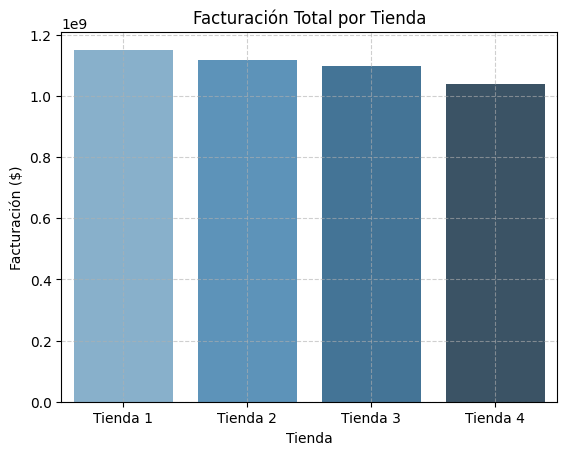

In [ ]:
sns.barplot(
    x='Tienda',
    y='Facturación',
    data=df_metricas,
    palette="Blues_d",
    hue='Tienda',        # Asigna la misma variable del eje x
    legend=False         # Evita la advertencia
)
plt.title('Facturación Total por Tienda')
plt.ylabel('Facturación ($)')
plt.xlabel('Tienda')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Gráfico 2: Calificación Promedio por Tienda (Gráfico Circular / Pie Chart)

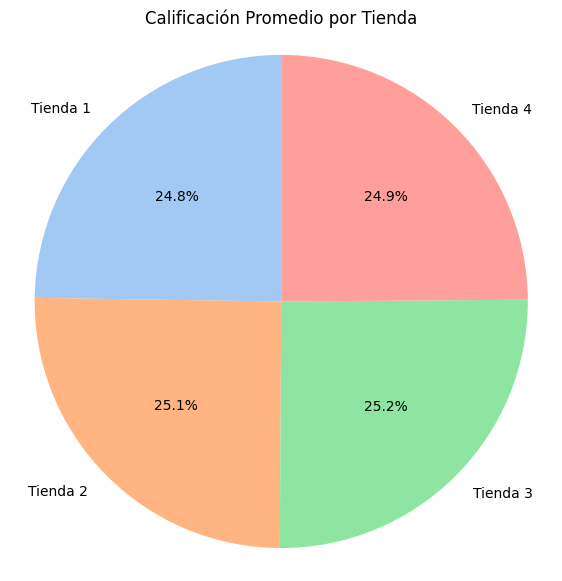

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(df_metricas['Calificación Promedio'], labels=df_metricas['Tienda'], autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("pastel"))
plt.title('Calificación Promedio por Tienda')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.show()

## Gráfico 3: Costo Promedio de Envío por Tienda (Gráfico de Barras Horizontales)

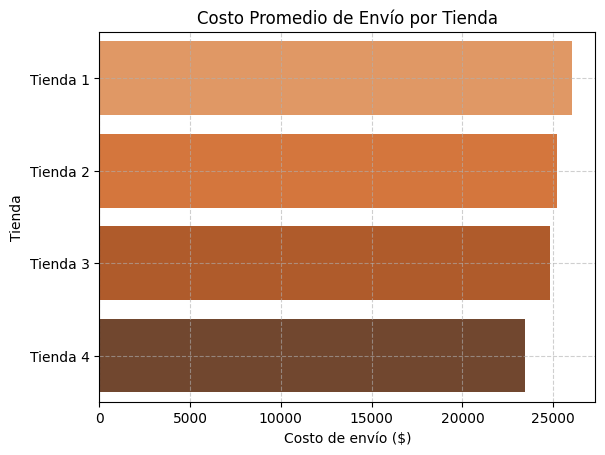

In [ ]:
sns.barplot(
    x='Costo de Envío Promedio',
    y='Tienda',
    data=df_metricas,
    palette="Oranges_d",
    hue='Tienda',        # Asigna la variable del eje y
    legend=False         # Evita la advertencia
)
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Costo de envío ($)')
plt.ylabel('Tienda')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Gráfico 4: Categorías Más Populares (Gráfico de Barras)

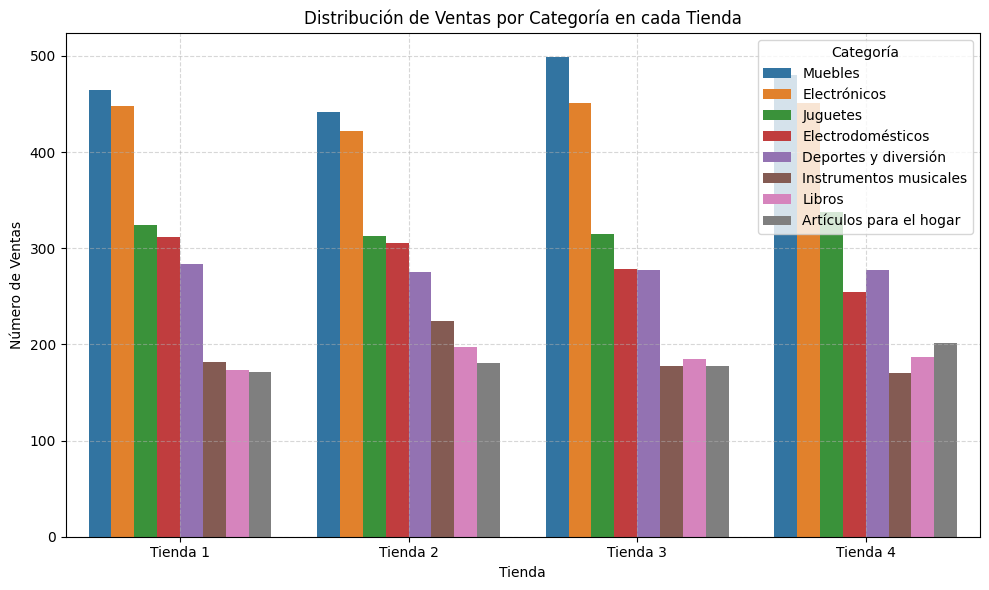

In [ ]:
# Contar categorías por tienda
def contar_categorias(df, nombre_tienda):
    if 'Categoría del Producto' in df.columns:
        return df['Categoría del Producto'].value_counts().reset_index(name='Ventas').assign(Tienda=nombre_tienda)
    else:
        return pd.DataFrame(columns=['Categoría del Producto', 'Ventas', 'Tienda'])

categorias_df = pd.concat([
    contar_categorias(tienda1, 'Tienda 1'),
    contar_categorias(tienda2, 'Tienda 2'),
    contar_categorias(tienda3, 'Tienda 3'),
    contar_categorias(tienda4, 'Tienda 4')
])

# Mostrar gráfico de barras apilado
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Ventas', hue='Categoría del Producto', data=categorias_df, errorbar=None)
plt.title('Distribución de Ventas por Categoría en cada Tienda')
plt.xlabel('Tienda')
plt.ylabel('Número de Ventas')
plt.legend(title='Categoría')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Informe Final: Cuál Tienda Vender

## 🔍 Introducción
  
El objetivo de este análisis es ayudar al Sr. Juan a identificar cuál de sus cuatro tiendas presenta un menor rendimiento general, con base en múltiples factores clave del negocio:

- Ingresos totales por tienda
- Categorías más populares
- Promedio de calificación de los clientes
- Productos más y menos vendidos
- Costo promedio del envío

Este análisis se realizó mediante técnicas de procesamiento de datos y visualización, con el fin de comparar el desempeño de cada tienda y brindar una recomendación clara y sustentada.

## 📊 Desarrollo del Análisis

### 1️⃣ Facturación Total por Tienda
  
| Tienda   | Facturación       |
| -------- | ----------------- |
| Tienda 1 | `$`1,150,880,400.00 |
| Tienda 2 | `$`1,116,343,500.00 |
| Tienda 3 | `$`1,098,019,600.00 |
| Tienda 4 | `$`1,038,375,700.00 |

**Análisis:** La **Tienda 4** tiene la **facturación más baja**, lo cual indica un volumen de ventas o precios promedio menores en comparación con las demás. Aunque la diferencia no es muy grande, sí marca tendencia en conjunto con otros indicadores.

### 2️⃣ Ventas por Categoría

| Tienda   | Categoría Popular | Ventas |
| -------- | ----------------- | ------ |
| Tienda 1 | Muebles           | 465    |
| Tienda 2 | Muebles           | 442    |
| Tienda 3 | Muebles           | 499    |
| Tienda 4 | Muebles           | 480    |

**Análisis:** Todas las tiendas tienen como categoría más popular **"Muebles"**, pero la **Tienda 3** lidera ligeramente en cantidad de ventas. Las categorías como **"Electrónicos"** también son importantes en todas las tiendas, lo que refleja una demanda sostenida.

### 3️⃣ Calificación Promedio de los Clientes  

| Tienda   | Calificación Promedio |
| -------- | --------------------- |
| Tienda 1 | 3.98                  |
| Tienda 2 | 4.04                  |
| Tienda 3 | 4.05                  |
| Tienda 4 | 4.00                  |

**Análisis:** La **Tienda 1** tiene la **calificación más baja**, lo que sugiere que hay oportunidades de mejora en la experiencia del cliente. La **Tienda 3** sigue siendo líder en satisfacción.  

### 4️⃣ Productos Más y Menos Vendidos

| Tienda   | Producto Más Vendido      | Ventas | Producto Menos Vendido  | Ventas |
| -------- | ------------------------- | ------ | ----------------------- | ------ |
| Tienda 1 | Microondas                | 60     | Celular ABXY            | 33     |
| Tienda 2 | Iniciando en programación | 65     | Juego de mesa           | 32     |
| Tienda 3 | Kit de bancas             | 57     | Bloques de construcción | 35     |
| Tienda 4 | Cama box                  | 62     | Guitarra eléctrica      | 33     |
  
**Análisis:** Todos los productos más vendidos tienen buena rotación. Sin embargo, en términos relativos, la **Tienda 2** destaca por tener el producto más vendido con 65 unidades. No hay diferencias significativas entre tiendas en cuanto a productos menos vendidos.

### 5️⃣ Costo Promedio del Envío

| Tienda   | Costo Promedio de Envío     |
| -------- | --------------------------- |
| Tienda 1 | `$`26,018.61                  |
| Tienda 2 | `$`25,216.24                  |
| Tienda 3 | `$`24,805.68                  |
| Tienda 4 | `$`23,459.46                  |

**Análisis:** La **Tienda 1** tiene el costo de envío más alto, lo cual puede estar afectando su rentabilidad pese a tener buena facturación. Por otro lado, la **Tienda 4** tiene el **menor costo de envío**, lo cual es positivo, pero no compensa su baja facturación.

## ✅ Conclusión

Tras analizar todos los indicadores clave (ingresos, satisfacción del cliente, costos operativos, categorías y productos vendidos), se puede concluir que:

> ### ❌ **La Tienda 4 es la opción más adecuada para vender.**

### Justificación

1. **Menor facturación total** : Es la tienda que menos ingresos genera.
2. **Calificación promedio intermedia-baja** : Aunque no es la peor, no destaca.
3. **Buen costo de envío** , pero no compensa la baja rentabilidad general.
4. **Productos con buena rotación** , pero no suficiente para elevar su rendimiento.

---

## 📌 Recomendación

➡️ **Vender la Tienda 4** es la estrategia más acorde con los datos presentados. Su baja facturación la convierte en la opción menos rentable.